# TP2 - Trabalho Prático 2
Resolva um problema de Clusterização em um Jupyter Notebook e envie sua resolução (arquivo .ipynb + conjunto de dados).

O conjunto de dados deve ter no mínimo 6 características (features) e 1000 amostras.

A resolução deve conter:

* Importação dos dados
* Análise dos dados
* Pré-processamento
* Uso de técnicas de clusterização
* Usar k-Means, DBScan e Clusterização Hierárquica
* Avaliação dos resultados
* Apresentação dos resultados
* Apresentação do trabalho (obrigatório)

## Importações

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split

#algoritmos
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

# técnicas
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram


%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/machine-learning/fetal_health.csv')

## Apresentação do problema: Fetal Health Classification
### Objetivo
Classificar a saúde fetal para prevenir a mortalidade infantil e materna.

### Contexto 
A redução da mortalidade infantil está refletida em vários Objetivos de Desenvolvimento Sustentável das Nações Unidas e é um indicador chave do progresso humano.
A ONU espera que, até 2030, os países acabem com as mortes evitáveis ​​de recém-nascidos e crianças menores de 5 anos, com todos os países visando reduzir a mortalidade de menores de 5 anos para pelo menos 25 por 1.000 nascidos vivos.

Paralelamente à noção de mortalidade infantil está, obviamente, a mortalidade materna, que é responsável por 295.000 mortes durante e após a gravidez e o parto (a partir de 2017). A grande maioria dessas mortes (94%) ocorreu em ambientes de poucos recursos e a maioria poderia ter sido evitada .

Diante do exposto, os Cardiotocogramas (CTGs) são uma opção simples e de baixo custo para avaliar a saúde fetal, permitindo que os profissionais de saúde atuem na prevenção da mortalidade infantil e materna. O próprio equipamento funciona enviando pulsos de ultrassom e lendo sua resposta, lançando luz sobre a frequência cardíaca fetal (FCF), movimentos fetais, contrações uterinas e muito mais.

### Dados 

Este conjunto de dados contém 2126 registros de características extraídas de exames de Cardiotocograma, que foram então classificados por três obstetras especialistas em 3 classes:
* Normal
* Suspeito
* Patológico


## Análise dos dados

In [4]:
df.shape

(2126, 22)

In [5]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

**Descrição da colunas**

'baseline value' - linha de base da FCF (batimentos por minuto)<br>
'accelerations' - Número de acelerações por segundo<br>
'fetal_movement' - Número de movimentos fetais por segundo<br>
'uterine_contractions' - Número de contrações uterinas por segundo<br> 
'light_decelerations' - Número de desacelerações de luz por segundo<br>
'severe_decelerations' - Número de desacelerações severas por segundo<br>
'prolongued_decelerations' - Número de desacelerações prolongadas por segundo<br>
'abnormal_short_term_variability' - Porcentagem de tempo com variabilidade anormal de curto prazo<br>
'mean_value_of_short_term_variability' - Valor médio da variabilidade de curto prazo<br> 
'percentage_of_time_with_abnormal_long_term_variability' - Porcentagem de tempo com variabilidade anormal de longo prazo<br>
'mean_value_of_long_term_variability' - Valor médio da variabilidade de longo prazo<br>
'histogram_width' - Largura do histograma FHR<br>
'histogram_min' - Mínimo (baixa frequência) do histograma da FCF<br>
'histogram_max' - Máximo (alta frequência) do histograma da FCF<br>
'histogram_number_of_peaks' - Número de picos do histograma<br>
'histogram_number_of_zeroes' - Número de zeros do histograma<br>
'histogram_mode' - modo de histograma<br>
'histogram_mean' - média do histograma<br>
'histogram_median' - mediana do histograma<br>
'histogram_variance' - Variação do histograma<br>
'histogram_tendency' - tendência do histograma<br>
'fetal_health' - marcado como 1 (normal), 2 (suspeito) e 3 (patológico)<br>

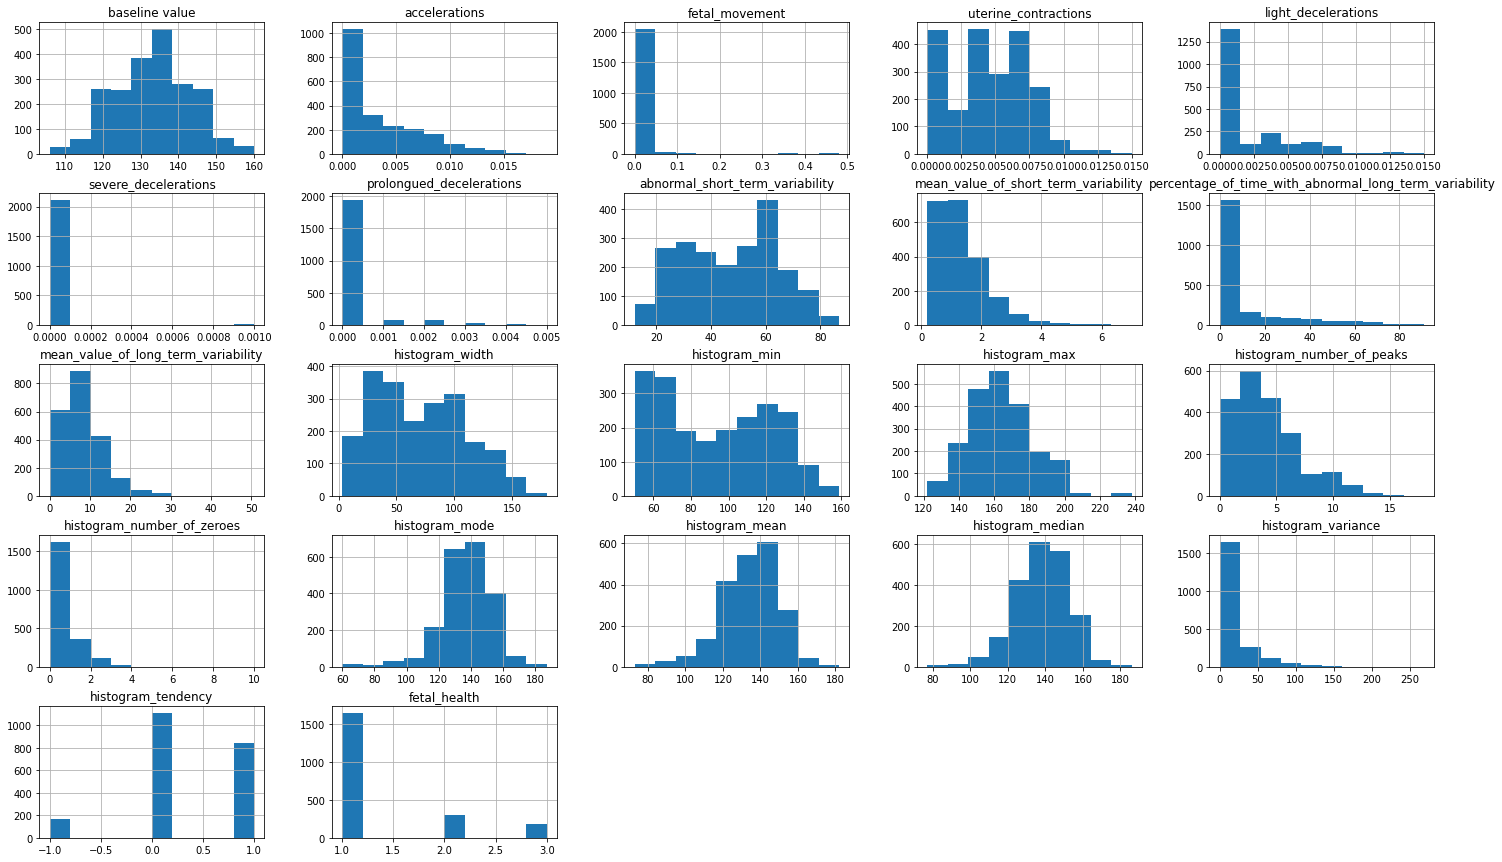

In [7]:
df.hist(figsize=(25,15));

In [8]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [9]:
max = df.max()
max

baseline value                                            160.000
accelerations                                               0.019
fetal_movement                                              0.481
uterine_contractions                                        0.015
light_decelerations                                         0.015
severe_decelerations                                        0.001
prolongued_decelerations                                    0.005
abnormal_short_term_variability                            87.000
mean_value_of_short_term_variability                        7.000
percentage_of_time_with_abnormal_long_term_variability     91.000
mean_value_of_long_term_variability                        50.700
histogram_width                                           180.000
histogram_min                                             159.000
histogram_max                                             238.000
histogram_number_of_peaks                                  18.000
histogram_

In [10]:
min = df.min()
min

baseline value                                            106.0
accelerations                                               0.0
fetal_movement                                              0.0
uterine_contractions                                        0.0
light_decelerations                                         0.0
severe_decelerations                                        0.0
prolongued_decelerations                                    0.0
abnormal_short_term_variability                            12.0
mean_value_of_short_term_variability                        0.2
percentage_of_time_with_abnormal_long_term_variability      0.0
mean_value_of_long_term_variability                         0.0
histogram_width                                             3.0
histogram_min                                              50.0
histogram_max                                             122.0
histogram_number_of_peaks                                   0.0
histogram_number_of_zeroes              

In [11]:
type(max)

pandas.core.series.Series

**Quantos valores maximos acontecem no df**

In [12]:
for i in max.index:
  filter = df[i] == max[i]
  result = df[filter]
  print(i, ': ', len(result))

baseline value :  1
accelerations :  1
fetal_movement :  1
uterine_contractions :  1
light_decelerations :  3
severe_decelerations :  7
prolongued_decelerations :  3
abnormal_short_term_variability :  1
mean_value_of_short_term_variability :  1
percentage_of_time_with_abnormal_long_term_variability :  4
mean_value_of_long_term_variability :  1
histogram_width :  1
histogram_min :  1
histogram_max :  6
histogram_number_of_peaks :  1
histogram_number_of_zeroes :  1
histogram_mode :  1
histogram_mean :  1
histogram_median :  1
histogram_variance :  1
histogram_tendency :  846
fetal_health :  176


**Quantos valores minimos acontecem no df**

In [13]:
for i in min.index:
  filter = df[i] == min[i]
  result = df[filter]
  print(i, ': ', len(result))

baseline value :  7
accelerations :  894
fetal_movement :  1311
uterine_contractions :  332
light_decelerations :  1231
severe_decelerations :  2119
prolongued_decelerations :  1948
abnormal_short_term_variability :  2
mean_value_of_short_term_variability :  47
percentage_of_time_with_abnormal_long_term_variability :  1240
mean_value_of_long_term_variability :  137
histogram_width :  2
histogram_min :  77
histogram_max :  2
histogram_number_of_peaks :  107
histogram_number_of_zeroes :  1624
histogram_mode :  6
histogram_mean :  1
histogram_median :  1
histogram_variance :  187
histogram_tendency :  165
fetal_health :  1655


In [14]:
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [15]:
matriz_corr = df.corr(method='pearson')

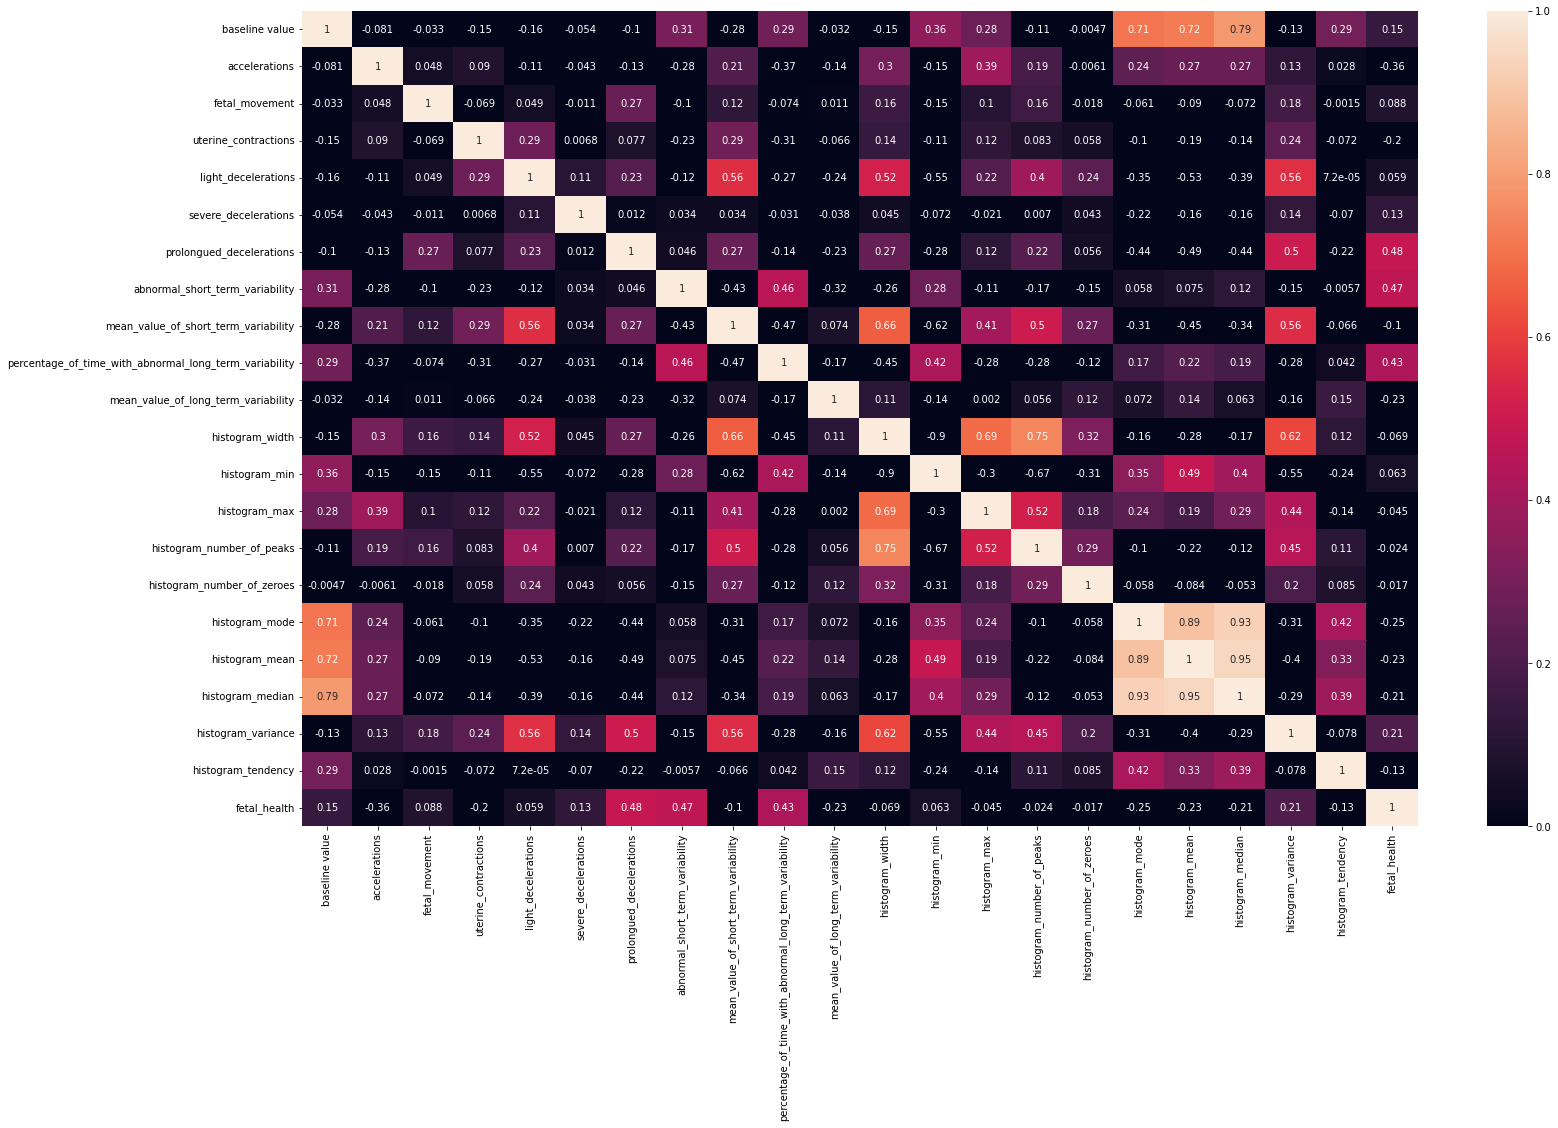

In [16]:
plt.figure(figsize=(25, 15))
sns.heatmap(matriz_corr, annot=True, vmin=0, vmax=1);

In [17]:
type(matriz_corr['fetal_health'])

pandas.core.series.Series

In [18]:
matriz_corr['fetal_health'].index

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

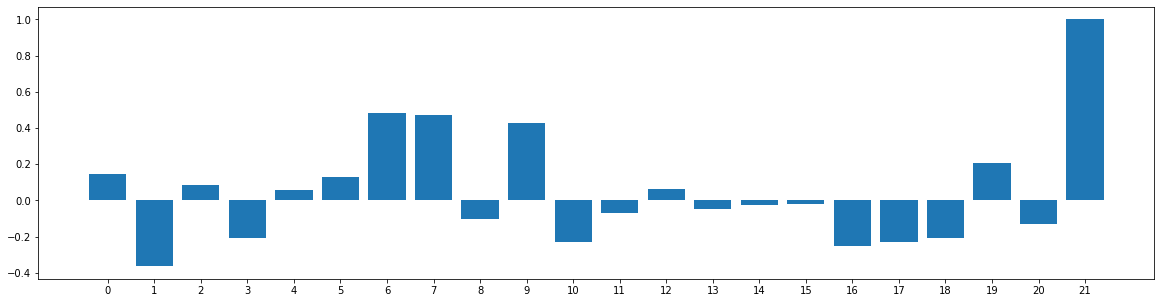

In [19]:
x = np.arange(len(matriz_corr['fetal_health']))
plt.subplots(figsize=(20,5))
plt.bar(x, matriz_corr['fetal_health'], tick_label = x);

In [20]:
matriz_corr['fetal_health'].sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

## Pré-processamento

Selecao de features

In [21]:
filter = abs(matriz_corr['fetal_health']).sort_values(ascending=False)
filter

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
accelerations                                             0.364066
histogram_mode                                            0.250412
histogram_mean                                            0.226985
mean_value_of_long_term_variability                       0.226797
histogram_variance                                        0.206630
histogram_median                                          0.205033
uterine_contractions                                      0.204894
baseline value                                            0.148151
histogram_tendency                                        0.131976
severe_decelerations                                      0.131934
mean_value_of_short_term_variability                      0.10

Selecionar apenas as colunas que possuem acima de 14% de correlacao

In [22]:
(filter.values > 0.14).sum()

12

In [23]:
columns = filter.index[:12]
columns

Index(['fetal_health', 'prolongued_decelerations',
       'abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'accelerations', 'histogram_mode', 'histogram_mean',
       'mean_value_of_long_term_variability', 'histogram_variance',
       'histogram_median', 'uterine_contractions', 'baseline value'],
      dtype='object')

In [24]:
df = df[columns]

In [25]:
df

,fetal_health,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,accelerations,histogram_mode,histogram_mean,mean_value_of_long_term_variability,histogram_variance,histogram_median,uterine_contractions,baseline value
0,2.0,0.0,73.0,43.0,0.000,120.0,137.0,2.4,73.0,121.0,0.000,120.0
1,1.0,0.0,17.0,0.0,0.006,141.0,136.0,10.4,12.0,140.0,0.006,132.0
2,1.0,0.0,16.0,0.0,0.003,141.0,135.0,13.4,13.0,138.0,0.008,133.0
3,1.0,0.0,16.0,0.0,0.003,137.0,134.0,23.0,13.0,137.0,0.008,134.0
4,1.0,0.0,16.0,0.0,0.007,137.0,136.0,19.9,11.0,138.0,0.008,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2.0,0.0,79.0,25.0,0.000,153.0,150.0,7.2,2.0,152.0,0.007,140.0
2122,2.0,0.0,78.0,22.0,0.001,152.0,148.0,7.1,3.0,151.0,0.007,140.0
2123,2.0,0.0,79.0,20.0,0.001,153.0,148.0,6.1,4.0,152.0,0.007,140.0
2124,2.0,0.0,78.0,27.0,0.001,152.0,147.0,7.0,4.0,151.0,0.006,140.0


## Técnicas

In [26]:
data = df.iloc[:,1:].values

In [52]:
from libs.silhouette import silhouette

**Kmeans**

In [53]:
clusterings = [] 
silhouettes = [] 
sample_silhouette_values = [] 
inertias =[]
mink = 2
maxk = 5
for k in range(mink, maxk):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    clusterings.append(kmeans)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(data, kmeans.labels_, metric="euclidean", sample_size=300,))
    sample_silhouette_values.append( silhouette_samples(data, kmeans.labels_))   

In [57]:
silhouettes

[0.45603440120725564, 0.283013879297947, 0.2680139787050654]

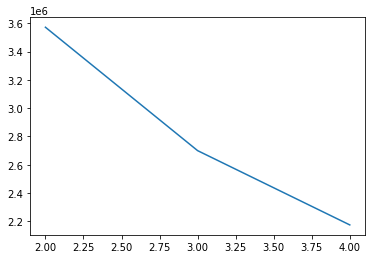

In [54]:
plt.plot(range(mink, maxk),inertias)

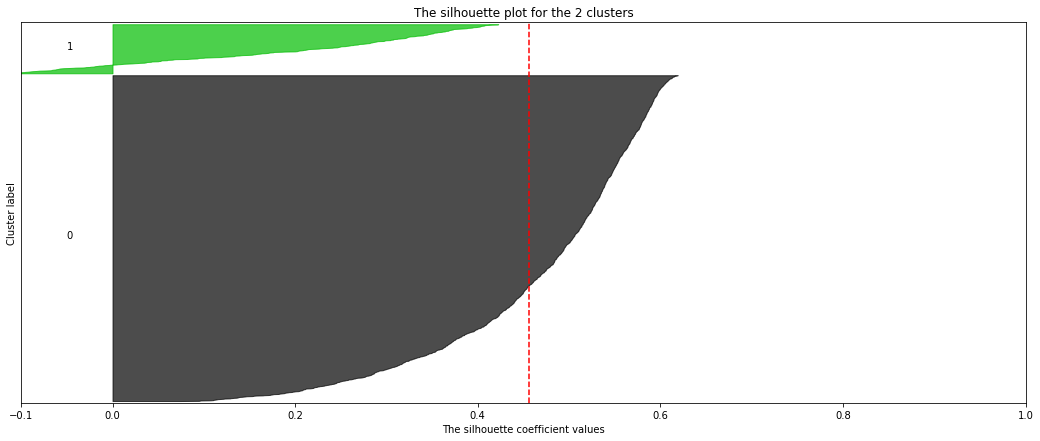

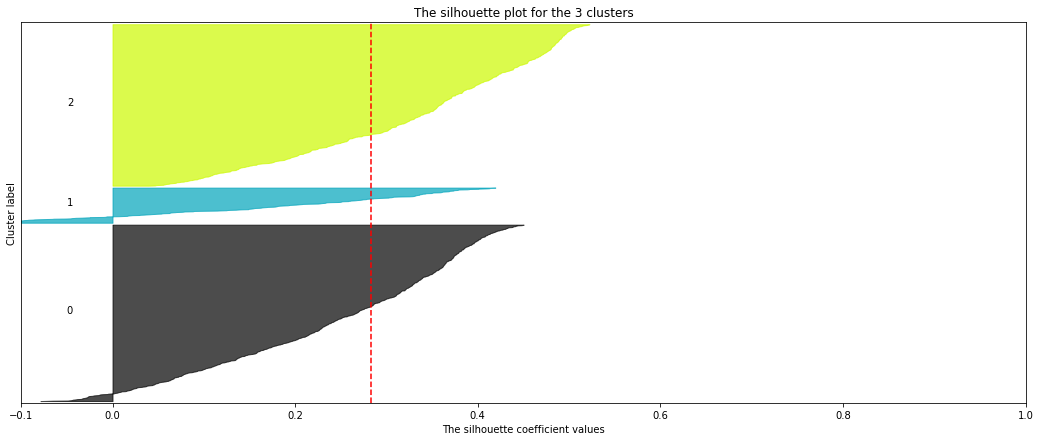

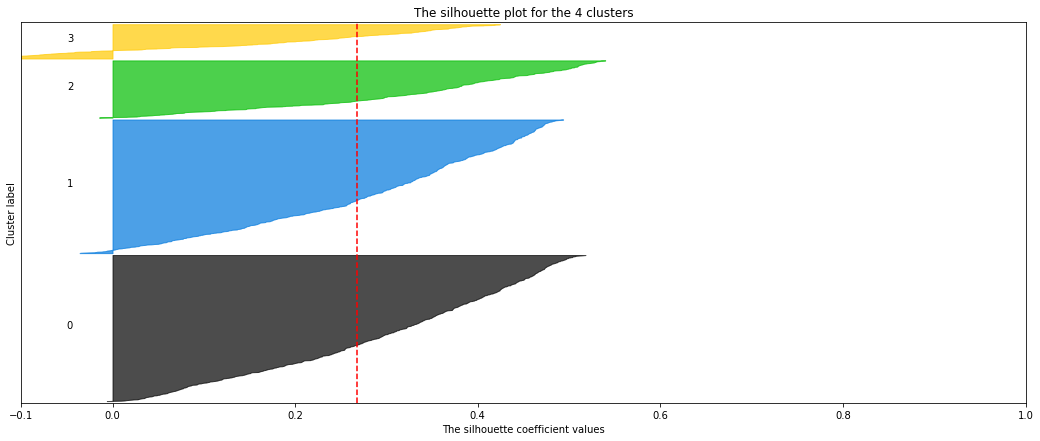

In [55]:
for cl, sample_sv , silhouette_avg in zip(clusterings, sample_silhouette_values, silhouettes):
  silhouette.plot(cl, sample_sv, silhouette_avg, cl.n_clusters, data)

**Clusterização hierárquica**

In [76]:
clusterings = [] 
silhouettes = [] 
sample_silhouette_values = [] 
mink = 2
maxk = 5
for k in range(mink, maxk):
    model = AgglomerativeClustering(linkage='ward', n_clusters=k)
    model.fit(X=data)
    clusterings.append(model)
    silhouettes.append(silhouette_score(data, model.labels_, metric="euclidean", sample_size=300,))
    sample_silhouette_values.append( silhouette_samples(data, kmeans.labels_))

In [77]:
silhouettes

[0.25017757020478776, 0.24881515226869808, 0.24750977610355457]

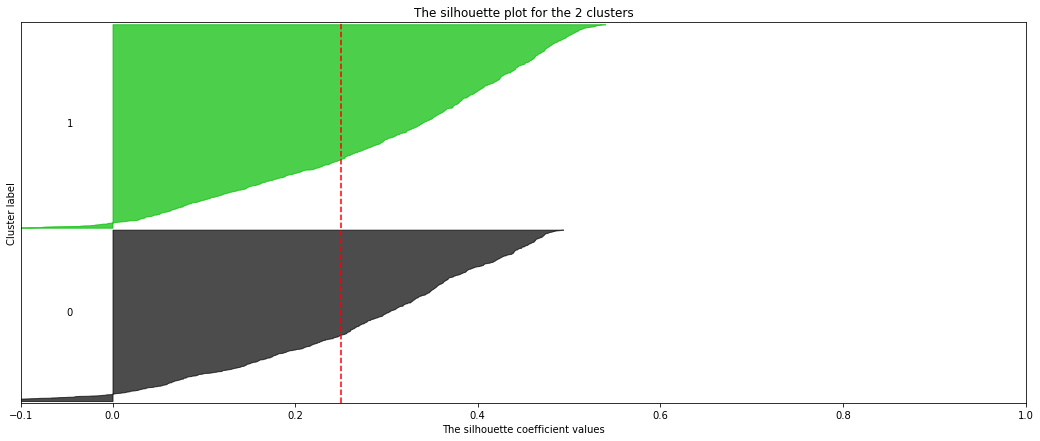

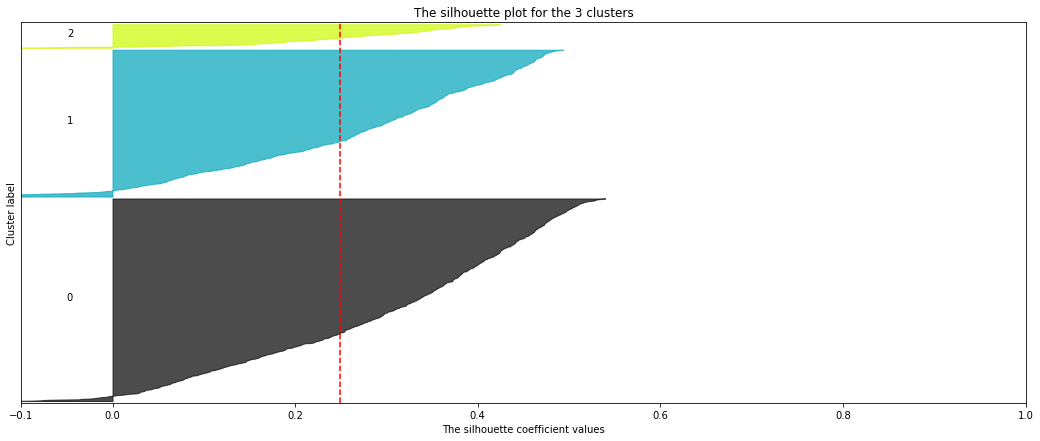

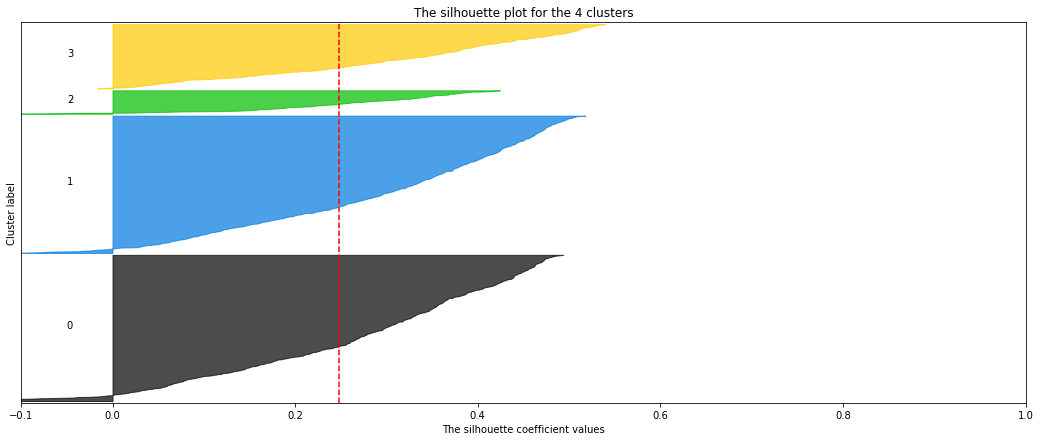

In [78]:
for cl, sample_sv , silhouette_avg in zip(clusterings, sample_silhouette_values, silhouettes):
  silhouette.plot(cl, sample_sv, silhouette_avg, cl.n_clusters, data)

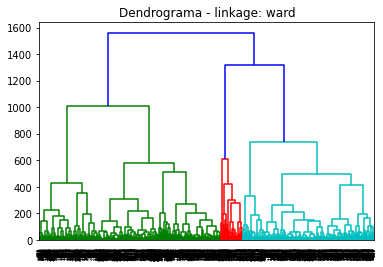

In [99]:
Z = hierarchy.ward(data)
plt.figure()
plt.title("Dendrograma - linkage: ward")
dn = hierarchy.dendrogram(Z)

**DBscan**

In [87]:
def plot_db_clusters(db, X):
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    unique_labels = set(db.labels_)
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (db.labels_ == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=6)

    plt.title('Nombre de Clusters: %d' % n_clusters)

In [93]:
dbscan = DBSCAN(min_samples = 3)
db = dbscan.fit(data)
labels = set(db.labels_)

In [94]:
labels

{-1, 0}

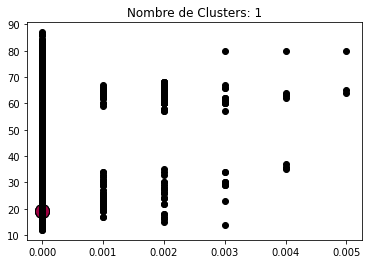

In [95]:
plot_db_clusters(db, data)

## Fim